In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
TRAIN_DIR = r"C:\Users\49965\Downloads\train\train\train"

file_list = os.listdir(TRAIN_DIR)
data = []

for filename in file_list:
    if filename.lower().startswith("dog"):
        label = "dog"
    elif filename.lower().startswith("cat"):
        label = "cat"
    else:
        continue
    data.append((os.path.join(TRAIN_DIR, filename), label))

df = pd.DataFrame(data, columns=["filename", "class"])

In [3]:
print(df["class"].value_counts())


class
cat    12500
dog    12500
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["class"])


In [5]:
print(train_df["class"].value_counts())


class
dog    10000
cat    10000
Name: count, dtype: int64


In [6]:
datagen = ImageDataGenerator( #here are many factors just to help model generalize better
    rescale=1./255,
    rotation_range=20,     
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True  
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="class",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filename",
    y_col="class",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\49965\.conda\envs\networks\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#added early_stopping to prevent overfitting
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 596s 953ms/step - accuracy: 0.6183 - loss: 0.6417 - val_accuracy: 0.6024 - val_loss: 0.6815
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 438s 701ms/step - accuracy: 0.6807 - loss: 0.5898 - val_accuracy: 0.7062 - val_loss: 0.5690
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 540s 865ms/step - accuracy: 0.7120 - loss: 0.5608 - val_accuracy: 0.7212 - val_loss: 0.5429
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 478s 764ms/step - accuracy: 0.7357 - loss: 0.5250 - val_accuracy: 0.7298 - val_loss: 0.5501
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 486s 778ms/step - accuracy: 0.7510 - loss: 0.5057 - val_accuracy: 0.7268 - val_loss: 0.5651
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 524s 838ms/step - accuracy: 0.7698 - loss: 0.4790 - val_accuracy: 0.7280 - val_loss: 0.5314
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 493s 789ms/step - accuracy: 0.7912 - loss: 0.4488 - val_accuracy: 0.8090 - val_loss: 0.4098
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 483s 773ms/step - accuracy: 0.7966 -

*ACCURACY (ON TRAINING SET)-> 0.8239* 
*LOSS OF EVALUATION (ON TRAINING SET) ->0.3930*

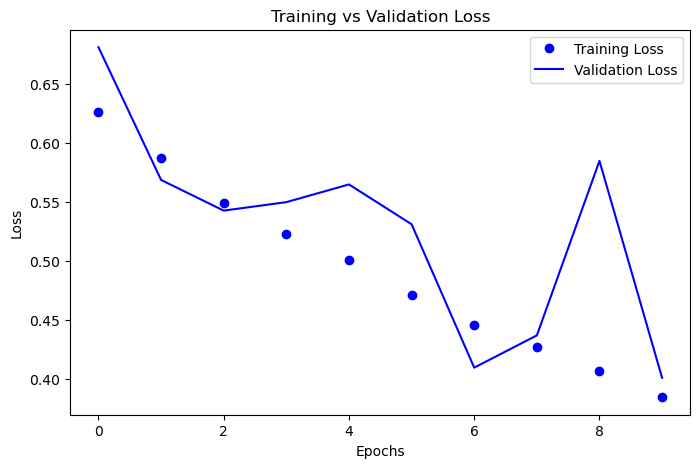

In [13]:

if 'loss' in history.history and 'val_loss' in history.history:
    plt.figure(figsize=(8,5))

    # Plot training loss as blue dots
    plt.plot(history.history['loss'], 'bo', label='Training Loss')  # 'bo' = blue dots

    # Plot validation loss as a continuous blue line
    plt.plot(history.history['val_loss'], 'b-', label='Validation Loss')  # 'b-' = blue line

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()
else:
    print("Error: Loss values not found in history. Make sure the model has been trained.")


In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'g--', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'b-', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Time")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'r-.', label='Train Loss') 
plt.plot(history.history['val_loss'], 'm:', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")

plt.show()


Validation Accuracy and Validation Loss are not the best because of overfitting, but by added early_stopping and adding more factors to datagen (ImageDataGenerator) and also a Dropout of 0.5, it should be better.

In [47]:
import os
print(os.getcwd())


c:\Users\49965\Downloads\train\train


In [48]:
os.chdir(r"C:\Users\49965\Downloads\train\train\MODEL")
MODEL = (r"C:\Users\49965\Downloads\train\train\MODEL")
model_path = os.path.join("MODEL", "dog_vs_cat_model.h5")
model.save(model_path)

print(f"Model saved successfully at {model_path}")


Model saved successfully at MODEL\dog_vs_cat_model.h5


In [ ]:
print(os.path.exists("train/dog.0.jpeg"))
#here i was just checking how the path is defined for my train pictures

In [ ]:
print(os.path.exists(r"C:\Users\49965\Downloads\train\train\train\dog.0.jpg"))

In [15]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    if not os.path.exists(img_path):
        print(f"!!Error: File '{img_path}' not found.")
        return

    img = image.load_img(img_path, target_size=(128, 128))

    img_array = image.img_to_array(img) / 255.0

    img_array = np.expand_dims(img_array, axis=0)




    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print(f"{img_path}: It's a dog!")
    else:
        print(f"{img_path}: It's a cat!")


predict_image(r"C:\Users\49965\Downloads\train\train\train\cat.4391.jpg")
predict_image(r"C:\Users\49965\Downloads\train\train\train\dog.5397.jpg")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
C:\Users\49965\Downloads\train\train\train\cat.4391.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
C:\Users\49965\Downloads\train\train\train\dog.5397.jpg: It's a dog!


In [27]:
for i in range(1000,1102):

    predict_image(fr"C:\Users\49965\Downloads\train\train\train\cat.{i}.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
C:\Users\49965\Downloads\train\train\train\cat.1000.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
C:\Users\49965\Downloads\train\train\train\cat.1001.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
C:\Users\49965\Downloads\train\train\train\cat.1002.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
C:\Users\49965\Downloads\train\train\train\cat.1003.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
C:\Users\49965\Downloads\train\train\train\cat.1004.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
C:\Users\49965\Downloads\train\train\train\cat.1005.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
C:\Users\49965\Downloads\train\train\train\cat.1006.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
C:\Users\49965\Downloads\train\train\train\cat.1007.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
C:\Users\49965\Downloads\train\train\train\cat.1008.jpg: It's a cat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

In [ ]:
#If you'd like to see if my model works - instert path for a dog/cat photo in brackets and see :)
predict_image("here")

Now, just let me save the model as Keras and we're all set.

In [3]:
from tensorflow import keras

model = keras.models.load_model(r"C:\Users\49965\Downloads\train\train\MODEL\dog_vs_cat_model.h5")

model.save("BARTOSZ_GORNICKI_49965_CATS_VS_DOGS_ML.keras", save_format="keras")

print("Model successfully saved as BARTOSZ_GORNICKI_49965_CATS_VS_DOGS_ML.keras")

Model successfully saved as BARTOSZ_GORNICKI_49965_CATS_VS_DOGS_ML.keras


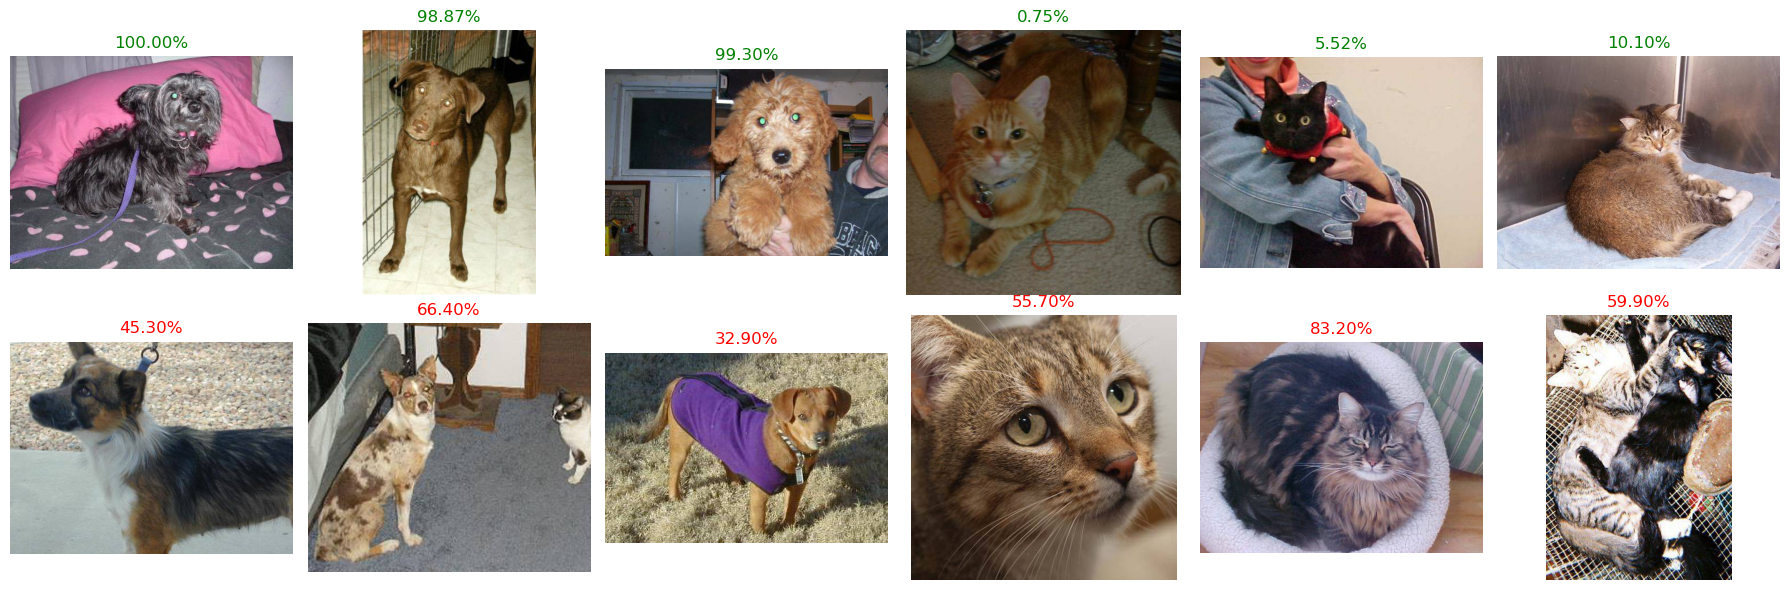

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


def display_images(correct_images, incorrect_images, correct_labels, incorrect_labels):
    fig, axes = plt.subplots(2, 6, figsize=(18, 6))

    for i, img_path in enumerate(correct_images):
        img = Image.open(img_path)
        axes[0, i].imshow(img)
        axes[0, i].set_title(f"{correct_labels[i]:.2f}%", color='green')
        axes[0, i].axis('off')  # Hide axes
    

    for i, img_path in enumerate(incorrect_images):
        img = Image.open(img_path)
        axes[1, i].imshow(img)
        axes[1, i].set_title(f"{incorrect_labels[i]:.2f}%", color='red')
        axes[1, i].axis('off') 
    
    plt.tight_layout()
    plt.show()



correct_images = [r'C:\Users\49965\Downloads\train\train\train\dog.0.jpg',
r'C:\Users\49965\Downloads\train\train\train\dog.1.jpg',
r'C:\Users\49965\Downloads\train\train\train\dog.5620.jpg',
r'C:\Users\49965\Downloads\train\train\train\cat.125.jpg',
r'C:\Users\49965\Downloads\train\train\train\cat.1969.jpg',
r'C:\Users\49965\Downloads\train\train\train\cat.9451.jpg']

incorrect_images = [r'C:\Users\49965\Downloads\train\train\train\dog.3.jpg',
r'C:\Users\49965\Downloads\train\train\train\dog.7.jpg',
r'C:\Users\49965\Downloads\train\train\train\dog.53.jpg',
r'C:\Users\49965\Downloads\train\train\train\cat.54.jpg',
r'C:\Users\49965\Downloads\train\train\train\cat.1043.jpg',
r'C:\Users\49965\Downloads\train\train\train\cat.1048.jpg']


correct_labels = [100.0, 98.87, 99.3, 0.75, 5.52, 10.1] 
incorrect_labels = [45.3, 66.4, 32.9, 55.7, 83.2, 59.9]  

display_images(correct_images, incorrect_images, correct_labels, incorrect_labels)
